## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'c:/Users/jadha/Data/MTP_data/Train'
valid_path = 'c:/Users/jadha/Data/MTP_data/Test'


In [6]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('c:/Users/jadha/Data/MTP_data/Train/*')

In [9]:
folders

['c:/Users/jadha/Data/MTP_data/Train\\Catla',
 'c:/Users/jadha/Data/MTP_data/Train\\Comman carp',
 'c:/Users/jadha/Data/MTP_data/Train\\Grass Carp',
 'c:/Users/jadha/Data/MTP_data/Train\\Mrigal',
 'c:/Users/jadha/Data/MTP_data/Train\\Pomfret',
 'c:/Users/jadha/Data/MTP_data/Train\\Rohu',
 'c:/Users/jadha/Data/MTP_data/Train\\Silver Carp',
 'c:/Users/jadha/Data/MTP_data/Train\\Tilapia',
 'c:/Users/jadha/Data/MTP_data/Train\\Tuna']

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [11]:
len(folders)

9

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('c:/Users/jadha/Data/MTP_data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 970 images belonging to 9 classes.


In [17]:
test_set = test_datagen.flow_from_directory('c:/Users/jadha/Data/MTP_data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 147 images belonging to 9 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\jadha\AppData\Local\Temp\ipykernel_34300\177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
31/31 [==============================] - 501s 16s/step - loss: 1.3507 - accuracy: 0.5701 - val_loss: 0.6658 - val_accuracy: 0.8027
Epoch 2/10
31/31 [==============================] - 2457s 82s/step - loss: 0.4001 - accuracy: 0.8742 - val_loss: 0.3283 - val_accuracy: 0.9320
Epoch 3/10
31/31 [==============================] - 334s 11s/step - loss: 0.2176 - accuracy: 0.9423 - val_loss: 0.3117 - val_accuracy: 0.9320
Epoch 4/10
31/31 [==============================] - 337s 11s/step - loss: 0.1769 - accuracy: 0.9526 - val_loss: 0.2461 - val_accuracy: 0.9320
Epoch 5/10
31/31 [==============================] - 381s 12s/step - loss: 0.1216 - accuracy: 0.9742 - val_loss: 0.2324 - val_accuracy: 0.9456
Epoch 6/10
31/31 [==============================] - 333s 11s/step - loss: 0.0970 - accuracy: 0.9856 - val_loss: 0.2214 - val_accuracy: 0.9456
Epoch 7/10
31/31 [==============================] - 347s 11s/step - loss: 0.0830 - accuracy: 0.9835 - val_loss: 0.1959 - val_accuracy: 0.9592
Epoch

In [19]:
# fit the model
# # Run the cell. It will take some time to execute
# r = model.fit_generator(
#   training_set,
#   epochs=10,
#   steps_per_epoch=len(training_set)
# )

In [20]:
import matplotlib.pyplot as plt

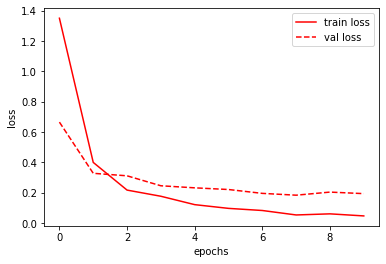

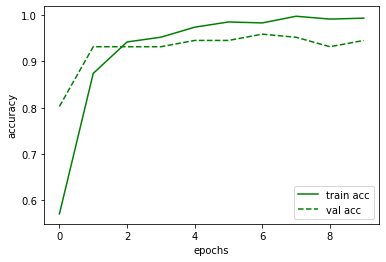

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss',color='r')
plt.plot(r.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc',color='g')
plt.plot(r.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [53]:
y_predicted=model.predict(test_set)
y_predicted

5/5 [==============================] - 41s 8s/step


array([[2.07861827e-04, 1.80353979e-07, 2.48116606e-07, ...,
        3.47356558e-06, 9.42148734e-04, 1.03562803e-03],
       [1.95058971e-03, 1.61080959e-06, 1.45795551e-04, ...,
        3.05835397e-06, 1.03694825e-02, 9.28331353e-03],
       [3.14714424e-02, 8.76492858e-01, 2.36762105e-03, ...,
        5.85087168e-04, 4.56658825e-07, 2.73701488e-08],
       ...,
       [1.36144998e-04, 2.26884822e-08, 1.97741847e-05, ...,
        1.01554571e-04, 3.67668108e-05, 9.97829497e-01],
       [1.31387101e-03, 1.20980658e-04, 1.11818845e-04, ...,
        9.98076797e-01, 4.23394425e-07, 1.02241437e-07],
       [9.81311738e-01, 8.85156055e-08, 4.52394495e-08, ...,
        5.50438335e-06, 1.41511764e-05, 3.96115182e-04]], dtype=float32)

In [34]:
y_pred = np.argmax(y_predicted, 1)
y_pred

array([1, 8, 6, 5, 7, 4, 5, 5, 4, 2, 7, 2, 7, 8, 4, 3, 6, 5, 2, 5, 2, 6,
       3, 5, 4, 2, 3, 5, 7, 4, 5, 7, 4, 4, 1, 7, 5, 4, 6, 5, 4, 4, 7, 8,
       5, 4, 0, 1, 0, 4, 3, 1, 3, 4, 7, 5, 4, 5, 3, 8, 5, 7, 3, 0, 3, 7,
       0, 3, 7, 7, 3, 4, 3, 3, 0, 4, 1, 7, 8, 3, 6, 4, 2, 8, 7, 4, 4, 3,
       5, 5, 5, 4, 4, 1, 7, 5, 6, 5, 4, 5, 1, 5, 0, 7, 5, 4, 6, 3, 8, 7,
       6, 4, 3, 4, 5, 6, 3, 3, 3, 4, 8, 3, 3, 3, 2, 4, 0, 4, 0, 5, 0, 1,
       4, 3, 8, 7, 1, 7, 4, 0, 0, 1, 7, 0, 8, 3, 6], dtype=int64)

In [50]:
y_actual=test_set.classes
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [51]:
confusion_matrix(y_actual,y_pred)

array([[0, 1, 3, 1, 3, 5, 2, 3, 2],
       [0, 0, 2, 2, 2, 2, 1, 1, 0],
       [0, 1, 0, 0, 2, 2, 0, 2, 0],
       [2, 2, 0, 2, 7, 3, 1, 2, 1],
       [3, 1, 1, 8, 5, 2, 1, 6, 3],
       [1, 2, 0, 1, 4, 8, 2, 2, 0],
       [0, 0, 0, 3, 2, 1, 2, 1, 1],
       [3, 2, 1, 6, 4, 1, 0, 1, 2],
       [3, 1, 0, 1, 1, 0, 1, 2, 1]], dtype=int64)

In [47]:
class_labels = list(test_set.class_indices.keys()) 
class_labels

['Catla',
 'Comman carp',
 'Grass Carp',
 'Mrigal',
 'Pomfret',
 'Rohu',
 'Silver Carp',
 'Tilapia',
 'Tuna']

In [40]:
# #confusion matrix
# # You need to iterate over the data, then you can collect predictions and true classes.
# predicted_probs = np.empty([])
# true_classes =  np.empty([])

# for images, labels in test_set:
#   predicted_probs = np.concatenate([predicted_probs,
#                        model(images)])
#   true_classes = np.concatenate([true_classes, labels.numpy()])

# # Since they are sigmoid outputs, you need to transform them into classes with a threshold, i.e 0.5 here:
# predicted_classes = [1 * (x[0]>=0.5) for x in predicted_probs]

# # confusion matrix etc:
# conf_matrix = tf.math.confusion_matrix(true_classes, predicted_classes)
# print(conf_matrix) 

In [43]:
#confusion matrix
#1.Predict classes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict_generator(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_set.classes, predicted_classes))

report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

C:\Users\jadha\AppData\Local\Temp\ipykernel_34300\1413942288.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_set, steps=test_steps_per_epoch)


['Catla', 'Comman carp', 'Grass Carp', 'Mrigal', 'Pomfret', 'Rohu', 'Silver Carp', 'Tilapia', 'Tuna']
[[20  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [ 5  2  0  0  0  0  0  0  0]
 [19  1  0  0  0  0  0  0  0]
 [27  3  0  0  0  0  0  0  0]
 [18  2  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0]
 [19  1  0  0  0  0  0  0  0]
 [ 8  2  0  0  0  0  0  0  0]]


NameError: name 'sklearn' is not defined

In [45]:
# fig = plt.figure(figsize=(10, 10)) # Set Figure

# y_pred = model.predict(test_set) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

# Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
# Y_test = np.argmax(test_set, 1) # Decode labels

# mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# # Plot Confusion matrix
# sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
# plt.xlabel('Predicted Values')
# plt.ylabel('True Values');
# plt.show();